# Исследование надежности заемщиков


Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [5]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [6]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [10]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [11]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [12]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [13]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [14]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [15]:
data.duplicated().sum()

71

In [16]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [17]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [22]:
#создание функции для группировки
def grouped(group):
    return data.pivot_table(index = group, values = ['debt'], aggfunc=['count', 'sum', 'mean']).droplevel(level=1, axis=1)

Разделим людей на группы в зависимости от количества детей и рассмотрим долю неоплативших кредит в срок.

- `count` - количество клиентов;
- `sum` - количество клиентов, неоплативших кредит в срок;
- `mean` - доля неоплативших кредит в срок в своей группе.

In [23]:
children_grouped = grouped('children')
children_grouped

,count,sum,mean
children,,,
0,14091,1063,0.075438
1,4808,444,0.092346
2,2052,194,0.094542
3,330,27,0.081818
4,41,4,0.097561
5,9,0,0.000000


Введем наименование групп:
 - `Бездетная` - количество детей - 0;
 - `Группы 1...5` - номер группы соответствует количеству детей у клиента.

<AxesSubplot:xlabel='children', ylabel='mean'>

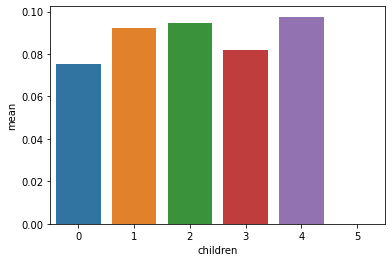

In [24]:
import seaborn as sb
sb.barplot(data = children_grouped, x = children_grouped.index, y = 'mean')

В данных отсутствуют клиенты с просроченным сроком выплаты из `Группы 5`, что может быть обусловленно малым количеством её представителей. Зависимость несет нарастающий характер, однако доля неоплативших кредит в срок из `Группы 3` выделяется на фоне зависимости.

In [25]:
#разница между средним групп 1, 2, 4 и бездетными
children_grouped.loc[[1,2,4], 'mean'].mean() - children_grouped.loc[0, 'mean']

0.019378102284589985

In [26]:
#разница 0 и 3
children_grouped.loc[3, 'mean'] - children_grouped.loc[0, 'mean']

0.006379958838975228

В соответствии с представленными данными:
 - 1. Доля клиентов с просроченным кредитом в `Бездетной` группе меньше, чем в остальных группах;
 - 2. Разница составляет порядка 2% с группами с одним, двумя и четырьмя детьми;
 - 3. При этом разница с группой с тремя детьми составляет порядка 0,6%.

Зависимость количества невернувших кредит в срок от количества детей несет нарастающий характер, однако видна аномалия (Пункт `3`). Данная аномалия может быть обусловлена малым количеством клиентов из `Группы 4`. Проверим, как будет вести себя зависимость, если уменьшить количество неоплативших в срок в `Группе 4` на один:

In [27]:
#объявляется временная таблица
child_gr_tmpr = children_grouped.copy()
#перезаписывается строка для Группы 4
child_gr_tmpr.loc[4,'sum'] = 3
child_gr_tmpr.loc[4,'mean'] = child_gr_tmpr.loc[4,'sum'] / child_gr_tmpr.loc[4,'count']
child_gr_tmpr

,count,sum,mean
children,,,
0,14091,1063,0.075438
1,4808,444,0.092346
2,2052,194,0.094542
3,330,27,0.081818
4,41,3,0.073171
5,9,0,0.000000


<AxesSubplot:xlabel='children', ylabel='mean'>

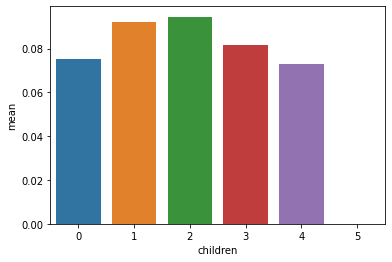

In [28]:
sb.barplot(data = child_gr_tmpr, x = child_gr_tmpr.index, y = 'mean')

При уменьшении количества клиентов с просроченными кредитами всего на один наблюдается нарастание зависимости до пикового значения в `Группе 2` и постепенный спад после него. Следовательно, оценивать `Группу 4` в её нынешних масштабах некорректно.

Так как имеются две группы (`Группа 4` и `Группа 5`), чей масштаб мал по сравнению с остальными, то объединим их.
 - `4+` - группа с четырьмя и более детьми

In [29]:
#переназначение строки с индексом 4 
children_grouped.loc[4] = children_grouped.loc[4:5].sum()
#удаление строки с индексом 5
children_grouped = children_grouped.loc[0:4]
#перерасчет среднего для строки с индексом 4
children_grouped.loc[4, 'mean'] = children_grouped.loc[4, 'sum'] / children_grouped.loc[4, 'count']
#введение столбца с категориями
children_grouped.loc[:,'child_count'] = ['Нет детей','1', '2', '3', '4+']
children_grouped

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,count,sum,mean,child_count
children,,,,
0,14091.0,1063.0,0.075438,Нет детей
1,4808.0,444.0,0.092346,1
2,2052.0,194.0,0.094542,2
3,330.0,27.0,0.081818,3
4,50.0,4.0,0.080000,4+


<AxesSubplot:xlabel='child_count', ylabel='mean'>

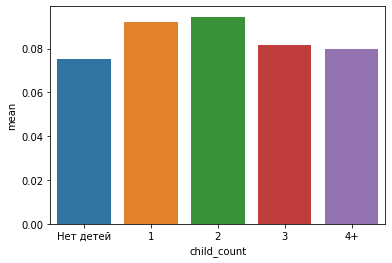

In [30]:
sb.barplot(data = children_grouped, x = 'child_count', y = 'mean')

**Вывод:**

Оценка групп с 4 и 5 детьми по отдельности не представляется возможной, из-за чего они объединены в одну группу.
Выявлена зависимость между количеством детей и возвратом кредита в срок
 - Нарастание доли клиентов с просроченным кредитом до пикового значения в группе клиентов с двумя детьми;
 - Спад в группе клиентов с тремя детьми и более.

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [31]:
fam_status_grouped = grouped('family_status')
#сортировка по убыванию 'mean'
fam_status_grouped = fam_status_grouped.sort_values(by ='mean', ascending = False)

fam_status_grouped

,count,sum,mean
family_status,,,
Не женат / не замужем,2796,273,0.097639
гражданский брак,4134,385,0.093130
женат / замужем,12261,927,0.075606
в разводе,1189,84,0.070648
вдовец / вдова,951,63,0.066246


<AxesSubplot:xlabel='mean', ylabel='family_status'>

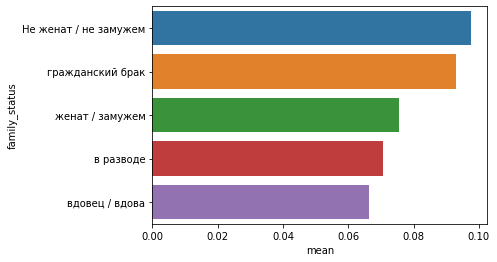

In [32]:
sb.barplot(data = fam_status_grouped, x ='mean' , y = fam_status_grouped.index)

In [33]:
#разница между средним групп, не состоящих в официальном браке, и группой в официальном браке
fam_status_grouped.loc['Не женат / не замужем':'гражданский брак','mean'].mean() - \
fam_status_grouped.loc['женат / замужем','mean']

0.019779233975189436

Клиенты, не состоящие в официальном браке (`Не женат/не замужем` и `гражданский брак`), имеют наибольшую долю просроченных кредитов в своих группах. В то время, как доля неоплативших клиентов в своей группе среди состоящих в браке ниже на порядка 2%. Клиенты, ранее состоявшие в браке, имеют наименьшую долю просроченных кредитов в своих группах.

**Вывод:** 

Выявлена зависимость возврата кредита в срок от семейного положения
 - Наибольшую долю неоплативших кредит в срок в своих группах имеют клиенты, не состоящие в официальном браке, то есть клиенты в статусе:`не женат/не замужем` и `гражданский брак`;
 - С разницей на 2% меньше долю неоплативших кредит в срок в своей группе имеют клиенты, состоящие в официальном браке, то есть клиенты в статусе `женат/замужем`;
 - Наименьшую долю неоплативших кредит в срок в своей группе имеют клиенты, ранее состоявшие в официально браке, то есть клиенты в статусе: `в разводе` и `вдовец/вдова`.

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

Обозначения исследуемых групп:
- `'A'` - доход 1 000 000+ - `Наиболее доходная`;
- `'B'` - доход от 200 001 до 1 000 000 - `Высокодоходоная`;
- `'C'` - доход от 50 001 до 200 000 - `Среднедоходная`;
- `'D'` - доход от 30 001 до 50 000 - `Малодоходная`;
- `'E'` - доход до 30 000 - `Наименее доходная`.

In [34]:
income_grouped = grouped('total_income_category')
income_grouped

,count,sum,mean
total_income_category,,,
A,25,2,0.080000
B,5014,354,0.070602
C,15921,1353,0.084982
D,349,21,0.060172
E,22,2,0.090909


Группы `A` и `E` слишком малы для оценки

In [35]:
income_grouped = income_grouped.loc['B':'D']
income_grouped

,count,sum,mean
total_income_category,,,
B,5014,354,0.070602
C,15921,1353,0.084982
D,349,21,0.060172


<AxesSubplot:xlabel='total_income_category', ylabel='mean'>

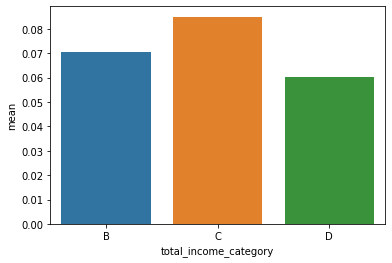

In [36]:
sb.barplot(data = income_grouped, x = income_grouped.index, y = 'mean')

In [37]:
#разница между C и D
income_grouped.loc['C', 'mean'] - income_grouped.loc['D', 'mean']

0.0248101793436036

In [38]:
#разница между C и B
income_grouped.loc['C','mean'] - income_grouped.loc['B', 'mean']

0.014379785592239222

In [39]:
#разница между B и D
income_grouped.loc['B', 'mean'] - income_grouped.loc['D', 'mean']

0.010430393751364377

 - Группа `'B'` - имеет нейтральную долю клиентов с просроченным сроком выплаты кредита. Разница с наибольшей составляет 1,5%;
 - Группа `'C'` - имеет наибольшую долю клиентов с просроченным сроком выплаты кредита;
 - Группа `'D'` - имеет наименьшую долю клиенту с просроченным сроком выплаты кредита. Разница с наибольшей - 2,5%, а со средней - 1%.

**Вывод:** 

Оценка групп с наибольшим и наименьшим доходом невозможна, ввиду малых масштабов данных групп.

- Группу, в которой доля клиентов с задолженностью наибольшая, представляют собой клиенты `Среднедоходной` группы, доход которой составляет от 50 000 до 200 000;
- `Высокодоходная` группа, чей доход составлет от 200 001 до 1 млн., имеет среднюю долю клиентов с задолженностью;
- Наименьшую долю клиентов с просроченным сроком выплаты кредита в своей группе имеет `Низкодоходная` группа, доход клиентов которой составляет от 30 001 до 50 тыс.

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

In [40]:
purpose_grouped = grouped('purpose_category')
purpose_grouped = purpose_grouped.sort_values(by = 'mean', ascending = False)
purpose_grouped

,count,sum,mean
purpose_category,,,
операции с автомобилем,4279,400,0.093480
получение образования,3988,369,0.092528
проведение свадьбы,2313,183,0.079118
операции с недвижимостью,10751,780,0.072551


<AxesSubplot:xlabel='mean', ylabel='purpose_category'>

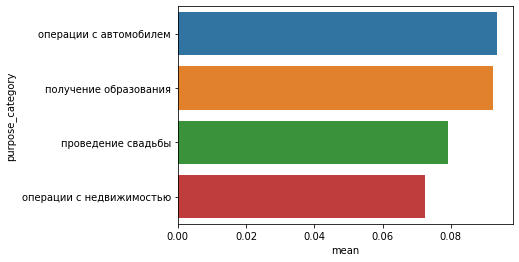

In [41]:
sb.barplot(data = purpose_grouped, x = 'mean', y = purpose_grouped.index)

In [42]:
purpose_grouped.loc['получение образования', 'mean'] - purpose_grouped.loc[ 'проведение свадьбы', 'mean']

0.013409554213873798

In [43]:
purpose_grouped.loc['проведение свадьбы', 'mean'] - purpose_grouped.loc[ 'операции с недвижимостью', 'mean']

0.006566637966051711

Исходя из распределеных данных:
- Наименьшая доля клиентов в своей группе с просроченными кредитами приходится на `Операции с недвижимостью`;
- Разница между целями для кредита `Проведение свадьбы` и `Операции с недвижимостью` составляет менее 1%;
- Наибольшая доля клиентов в своей группе с просроченными кредитами приходится на `Операции с автомобилем` и `Получение образования`.

Категории:
- `Операции с недвижимостью` - самая частая причина для получения кредита, наиболее дорогостоящий сектор. Наиболее долгосрочная причина - требует составления плана выплат;
- `Проведение свадьбы` - зависит от платежеспобности не одного клиента, а двух сторон, вступающих в брак;
- `Операции с автомобилем` и `Получение образования` - среднеценовой сегмент среди представленных категорий. Кредиты в данных категориях короткосрочные, по сравнению с `Операциями с недвижимостью`, и зависят от плетежеспособности только клиента.

**Вывод:** 

Возврат кредита в срок зависит от самого срока, в течение которого должен быть выплачен кредит, и количества вовлеченных сторон в цель этого кредита, так:
- Наименьшая доля клиентов в своей группе с просроченными кредитам берет его с целями: `Операции с недвижимостью` или `Проведение свадьбы`;
- Наибольшая доля клиентов в своей группе с просроченными кредитами приходится на `Операции с автомобилями` и `Получение образования`.

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

**Ответ:**

Исходя из информации, полученной в начале проекта, пропуски обнаружены в столбцах `days_employed` и `total_income`. Количество пропусков в данных столбцах одинаково, а сами столбцы заполняются вещественными числами. Проверим, расположены ли пропуски в одних и тех же строках.

In [44]:
err_data = pd.read_csv('/datasets/data.csv')

In [45]:
err_data = err_data[err_data.isna().any(axis=1)]

In [46]:
err_data.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу
65,0,NaN,21,среднее,1,Не женат / не замужем,4,M,компаньон,0,NaN,операции с коммерческой недвижимостью
67,0,NaN,52,высшее,0,женат / замужем,0,F,пенсионер,0,NaN,покупка жилья для семьи
72,1,NaN,32,высшее,0,женат / замужем,0,M,госслужащий,0,NaN,операции с коммерческой недвижимостью
82,2,NaN,50,высшее,0,женат / замужем,0,F,сотрудник,0,NaN,жилье
83,0,NaN,52,среднее,1,женат / замужем,0,M,сотрудник,0,NaN,жилье


In [47]:
err_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 12 to 21510
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          2174 non-null   int64  
 1   days_employed     0 non-null      float64
 2   dob_years         2174 non-null   int64  
 3   education         2174 non-null   object 
 4   education_id      2174 non-null   int64  
 5   family_status     2174 non-null   object 
 6   family_status_id  2174 non-null   int64  
 7   gender            2174 non-null   object 
 8   income_type       2174 non-null   object 
 9   debt              2174 non-null   int64  
 10  total_income      0 non-null      float64
 11  purpose           2174 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 220.8+ KB


Пропуски обнаружены в одних и тех же строках в столбцах с типом данных `float`.

Возможные причины появления пропусков:
 - Ошибка ввода данных оператором - поставлена запятая вместо точки;
 - В случае, если данные, в которых наблюдаются пропуски, получены с одного отделения банка или введены с одного устройства разными операторами, то проблема может заключаться в ошибке технического оборудования.

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

**Ответ:**

Если использовать заполнение средним значением, то наибольшие числа будут оказывать влияние на заполняемое значение. В качестве примера представим, что у нас есть оценки пользователей

In [48]:
# формирование целочисленного ряда
part_df = pd.DataFrame(data = [3, 3, 3, 3, 3, 4, 4, None, 10, 10], columns = ['response'])
part_df

,response
0,3.0
1,3.0
2,3.0
3,3.0
4,3.0
5,4.0
6,4.0
7,NaN
8,10.0
9,10.0


По ряду видно, что в нём преобладают `негативные` оценки, однако в конце ряда стоят две оценки `10`. Рассчитаем среднее и медиану, округлив их (так как поставить вещественную оценку невозможно), и получим:

In [49]:
print('Среднее:', round(part_df['response'].mean()))

Среднее: 5


Как мы видим, в случае со средним расчитана оценка `нейтрально`, ввиду действия на неё двух оценок по `10`. Теперь рассмотрим медиану:

In [50]:
print('Медиана:', round(part_df['response'].median()))

Медиана: 3


Здесь же медиана не учитывает вес `10`, а ориентируется на центр ряда.

### Шаг 4: общий вывод.

Напишите ваш общий вывод.

Обнаружены многочисленные пропуски в столбцах с вещественным типом данных. Возможные причины:
- Ошибка ввода данных оператором - поставлена запятая вместо точки;
- В случае, если данные, в которых наблюдаются пропуски, получены с одного отделения банка или введены с одного устройства разными операторами, то проблема может заключаться в ошибке технического оборудования.

Необходимо:
- Провести проверку заполнения форм операторами;
- Провести диагностику оборудования.

Найдены зависимости возрата кредита в срок в следующих полях представленных данных:
- Количество детей;
- Семейное положение;
- Уровень дохода;
- Цель кредита.

**Количество детей**

Начиная с "Бездетной" группы клиентов, происходит нарастание зависимости до пикового значения в группе с двумя детьми и спад в группах с тремя и более детьми. Так группы клиентов в порядке убывания их надежности: `Бездетная`, `4+ ребенка`, `3 ребенка`, `1 ребенок`, `2 ребенка`.

**Семейное положение**

Группы, входящие в категорию `Несостоящие в официальном браке`, обладают наибольшей долей неоплативших кредит в срок. При этом наименьшую долю имеют группы, входящие в категорию `Ранее состоявшие в официальном браке`. Так категории клиентов в порядке убывания их надежности:
- `Ранее состоявшие в официальном браке`: "вдова/вдовец", "в разводе";
- `Состоящие в официальном браке`: "женат/замужем";
- `Несостоящие в официальном браке`: "гражданский брак", "не женат/не замужем".

**Уровень дохода**

Наибольшую долю клиентов с задолженностью имеют клиенты из группы `Среднедоходная`, а наименьшую `Низкодоходная`, так категории клиентов в порядке убывания их надежности:
- `Низкодоходная`: от 30 до 50 тыс. руб;
- `Высокодоходная`: от 200 тыс. до 1 млн. руб.;
- `Среднедоходная`: от 50 тыс. до 200 тыс. руб.

При это оценка групп с доходом ниже 30 тыс. руб., а также выше 1 млн. руб., не представляется возвожной, ввиду нехватки данных.

**Цель кредита**

Наименьшая доля клиентов имеющих задолженности по кредиту представлена в группах, где выплата кредита зависит от составления плана выплат в течение большого срока или от количества заинтересованных сторон - группы `Операции с недвижимостью` и `Проведение свадьбы`. В свою очередь, наибольшая доля приходится на группы, где ценообразование меньше, по сравнению с недвижимостью, или зависит только от одного клиента - группы `Операции с автомобилем` и `Получение образования`.